Analysis of Purchases and Profits at a Superstore 

Brian Wang

Introduction:

This analysis utilizes the Superstore Dataset from Kaggle, which can be accessed from this link: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final.  It can also be downloaded directly from this link: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/download. The objective of this analysis is to uncover trends in profits and losses, discover areas of high sales and high profits, and determine the most and least profitable items.  

In this tutorial, I use the following libraries to help process the data: <br>
pandas <br>
numpy <br>
datetime <br>

I also use the following libraries to help visualize the data: <br> 
seaborn <br> 
matplotlib <br>
follium <br>
pgeocode <br>

This code snippet installs pgeocode, which is a library that helps convert postal codes to geographic coordinates.

In [37]:
debug = True # prints debug output if True

In [1]:
import sys
!{sys.executable} -m pip install pgeocode

In [2]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
from datetime import datetime
import pgeocode

In the code block above, I imported all the libraries that I will need.  In the code block below, I read the csv file into a pandas dataframe.

**Data collection and Parsing:** <br>
We start by downloading the data in the form of a CSV (Comma separated value) file.  Other formats work too, but they require different code to read into python.  We place this file in the same directory as our code.  

In [3]:
data = pd.read_csv('superstore.csv', sep = ',', encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Data management + Representation:** <br>
The next time is to process the data.  This means handling missing values and converting some datatypes into more useful ones.  Here, I will be simply ignoring any row with a NA value, since there isn't really a good default value for any of the columns.  In this case, there aren't any missing values.  I will also convert the order and ship dates to datetime objects, so they can be sorted if we want to perform an analysis based on that.

In [4]:
data.dropna(inplace = True)

In [5]:
def to_datetime(row, target_col):
    dt = datetime.strptime(row[target_col], '%m/%d/%Y') # expected format
    return dt
data['Order Datetime'] = data.apply(lambda row: to_datetime(row, 'Order Date'), axis=1)
data['Ship Datetime'] = data.apply(lambda row: to_datetime(row, 'Ship Date'), axis=1)
data.drop(['Order Date', 'Ship Date'], axis = 1, inplace = True)
data.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Datetime,Ship Datetime
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16
3,4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18


After creating the datetime objects, we can remove the original strings, since they are no longer needed.  I also think it may be good to have the items base price, discounted price, and profit per item sold, so I'll make columns for that and calculate based on sales, quantity, and discount.

In [6]:
def get_base_price(row):
    return row['Sales'] / (1 - row['Discount']) / row['Quantity'] # if there were ever 100% discounts, we would have a problem here, but there aren't

def get_sale_price(row):
    return row['Sales'] / row['Quantity']

def get_per_item_profit(row):
    return row['Profit'] / row['Quantity']

data['Base Price'] = data.apply(lambda row: get_base_price(row), axis=1)
data['Sale Price'] = data.apply(lambda row: get_sale_price(row), axis=1)
data['Profit Per Item'] = data.apply(lambda row: get_per_item_profit(row), axis=1)

data.sort_values(by = 'Profit Per Item', inplace = True, ascending = False) # we sort for the highest profit per item

data

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Order Datetime,Ship Datetime,Base Price,Sale Price,Profit Per Item
6826,6827,CA-2016-118689,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,...,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,2016-10-02,2016-10-09,3499.99,3499.990,1679.9952
4190,4191,CA-2017-166709,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,...,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,2017-11-17,2017-11-22,3499.99,3499.990,1679.9952
8153,8154,CA-2017-140151,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,...,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2017-03-23,2017-03-25,3499.99,3499.990,1679.9952
318,319,CA-2014-164973,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,10024,...,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900,2014-11-04,2014-11-09,1995.99,1995.990,997.9950
2623,2624,CA-2017-127180,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,...,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2017-10-22,2017-10-24,3499.99,2799.992,979.9972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4992,US-2017-122714,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,...,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,2017-12-07,2017-12-13,1889.99,377.998,-585.8969
3011,3012,CA-2017-134845,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,...,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,2017-04-17,2017-04-23,1699.99,509.997,-679.9960
683,684,US-2017-168116,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,...,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,2017-11-04,2017-11-04,3999.99,1999.995,-959.9976
7772,7773,CA-2016-108196,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,...,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,2016-11-25,2016-12-02,2999.99,899.997,-1319.9956


**Exploratory Data Analysis:** <br>
We can now explore the data to find insights.  I will start by finding all instances of negative profit, and look for commonalities in the entries.

In [7]:
neg_profit = data[data['Profit'] < 0] # select entries where profit is negative
neg_profit = neg_profit.sort_values(by = 'Profit', ascending = True) # display the biggest losses first
neg_profit

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Order Datetime,Ship Datetime,Base Price,Sale Price,Profit Per Item
7772,7773,CA-2016-108196,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,...,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,2016-11-25,2016-12-02,2999.99,899.997,-1319.9956
683,684,US-2017-168116,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,...,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,2017-11-04,2017-11-04,3999.99,1999.995,-959.9976
9774,9775,CA-2014-169019,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207,...,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,2014-07-26,2014-07-30,1360.99,272.198,-462.7366
3011,3012,CA-2017-134845,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,...,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,2017-04-17,2017-04-23,1699.99,509.997,-679.9960
4991,4992,US-2017-122714,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,...,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,2017-12-07,2017-12-13,1889.99,377.998,-585.8969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,4661,CA-2015-112130,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,Pennsylvania,19140,...,SanDisk Cruzer 16 GB USB Flash Drive,27.552,3,0.2,-0.3444,2015-05-03,2015-05-07,11.48,9.184,-0.1148
7413,7414,CA-2017-121125,Standard Class,MG-17890,Michael Granlund,Home Office,United States,Tigard,Oregon,97224,...,Tensor Brushed Steel Torchiere Floor Lamp,13.592,1,0.2,-0.3398,2017-05-30,2017-06-03,16.99,13.592,-0.3398
1566,1567,CA-2015-129112,First Class,AW-10840,Anthony Witt,Consumer,United States,Allen,Texas,75002,...,Kingston Digital DataTraveler 16GB USB 2.0,21.480,3,0.2,-0.2685,2015-11-29,2015-11-30,8.95,7.160,-0.0895
1496,1497,CA-2017-152485,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,...,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098,2017-09-04,2017-09-08,20.98,16.784,-0.2098


We can see that many of the biggest losses have multiple items sold, so we can also try and sort by loss per item.

In [8]:
neg_profit = neg_profit.sort_values(by = 'Profit Per Item', ascending = True) # display the biggest losses first
neg_profit

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Order Datetime,Ship Datetime,Base Price,Sale Price,Profit Per Item
7772,7773,CA-2016-108196,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,...,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,2016-11-25,2016-12-02,2999.99,899.997,-1319.9956
3151,3152,CA-2015-147830,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,Ohio,43055,...,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912,2015-12-15,2015-12-18,2999.99,899.997,-1319.9956
683,684,US-2017-168116,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,...,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,2017-11-04,2017-11-04,3999.99,1999.995,-959.9976
3011,3012,CA-2017-134845,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,...,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,2017-04-17,2017-04-23,1699.99,509.997,-679.9960
4991,4992,US-2017-122714,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,...,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,2017-12-07,2017-12-13,1889.99,377.998,-585.8969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,4661,CA-2015-112130,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,Pennsylvania,19140,...,SanDisk Cruzer 16 GB USB Flash Drive,27.552,3,0.2,-0.3444,2015-05-03,2015-05-07,11.48,9.184,-0.1148
1566,1567,CA-2015-129112,First Class,AW-10840,Anthony Witt,Consumer,United States,Allen,Texas,75002,...,Kingston Digital DataTraveler 16GB USB 2.0,21.480,3,0.2,-0.2685,2015-11-29,2015-11-30,8.95,7.160,-0.0895
8881,8882,CA-2016-135594,Second Class,AH-10120,Adrian Hane,Home Office,United States,Aurora,Illinois,60505,...,Kingston Digital DataTraveler 16GB USB 2.0,50.120,7,0.2,-0.6265,2016-06-30,2016-07-03,8.95,7.160,-0.0895
2769,2770,US-2015-122140,Standard Class,MO-17950,Michael Oakman,Consumer,United States,Dallas,Texas,75220,...,Kingston Digital DataTraveler 16GB USB 2.0,50.120,7,0.2,-0.6265,2015-04-02,2015-04-07,8.95,7.160,-0.0895


Looking at this, I noticed that the highest and lowest entries all have a non zero discount.  I want to check further and see if any non discounted items sold at a loss, so I filter the table again.

In [9]:
neg_profit2 = neg_profit[neg_profit['Discount'] == 0] # filter for discount = 0
neg_profit2

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Order Datetime,Ship Datetime,Base Price,Sale Price,Profit Per Item


We found out that the profit is always positive when there is no discount, which makes sense.  Next, I want to look at factors that may affect profits.  Since profits per item makes the most sense to look at, I will be graphing the variables against profits per item rather than overall profits.  We can use matplotlib and seaborn for this, since they make it very easy to graph different variables against each other.

Text(0, 0.5, 'Profit Per Item')

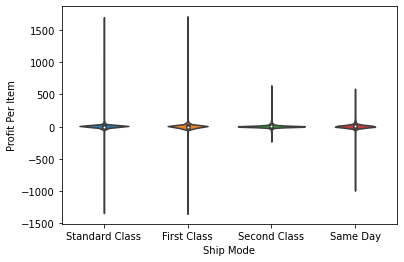

In [10]:
fig, ax = plt.pyplot.subplots()

sns.violinplot(x = 'Ship Mode', y = 'Profit Per Item', data=data, ax = ax)
ax.set_xlabel("Ship Mode")
ax.set_ylabel("Profit Per Item")

This graph looks a bit squished due to outliers.  From this, we can conclude that the vast majority of items across all classes have very little profit or loss.  We can also see that the median for each mode of shipping is around the same, so it doesn't seem that shipping mode affects profits much.  To get a closer look at the center, we can remove outliers and see what the graph looks like.

Text(0, 0.5, 'Profit Per Item')

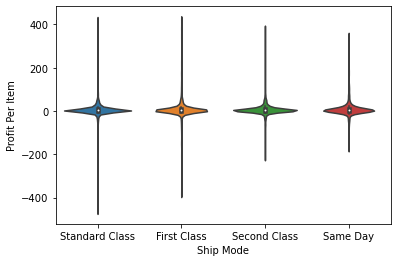

In [11]:
no_outliers = data[data['Profit Per Item'] < 500]
no_outliers = no_outliers[no_outliers['Profit Per Item'] > -500]

fig, ax = plt.pyplot.subplots()

sns.violinplot(x = 'Ship Mode', y = 'Profit Per Item', data=no_outliers, ax = ax)
ax.set_xlabel("Ship Mode")
ax.set_ylabel("Profit Per Item")

It may also be interesting to look at net profits and quantity by some variables. Since we can't average names, and it's inconvenient and unnecessary to average dates, we can drop them and anything else that we don't need.

In [12]:

pruned_data = data.drop(['Row ID', 'Base Price', 'Sale Price', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Order Datetime', 'Ship Datetime', 'Order ID', 'Ship Mode', 'Customer Name', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code'], axis = 1)
grouped_data = pruned_data.groupby('Product Name').agg({'Sales':'sum', 'Quantity':'sum','Profit':'sum', 'Discount':'mean', 'Profit Per Item':'mean'}) # we separate the dataframe into groups by product name and sum the results, but take the mean discount
grouped_data['Profit Per Item'] = grouped_data.apply(lambda row: get_per_item_profit(row), axis=1) # update profit per item since adding it together doesnt work
grouped_data['Profit Percent'] = grouped_data.apply(lambda row: row['Profit'] / row['Sales'] * 100, axis=1)
grouped_data.sort_values(by = 'Profit Percent', inplace = True, ascending = False)

grouped_data

,Sales,Quantity,Profit,Discount,Profit Per Item,Profit Percent
Product Name,,,,,,
"Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book",223.440,28,111.7200,0.0,3.990000,50.000000
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,3991.980,2,1995.9900,0.0,997.995000,50.000000
Avery 475,266.400,18,133.2000,0.0,7.400000,50.000000
Xerox 1890,244.700,5,122.3500,0.0,24.470000,50.000000
Tops Green Bar Computer Printout Paper,342.580,7,171.2900,0.0,24.470000,50.000000
...,...,...,...,...,...,...
Zebra GK420t Direct Thermal/Thermal Transfer Printer,703.710,6,-938.2800,0.7,-156.380000,-133.333333
Okidata B401 Printer,179.991,3,-251.9874,0.7,-83.995800,-140.000000
Euro Pro Shark Stick Mini Vacuum,170.744,11,-325.6332,0.6,-29.603018,-190.714286


Here, we get a bunch of stats by item.  It is important to note that the discount is approximate, since we are averaging across transcations instead of quantity of items, but it is a decent approximation.  We can immediately see that the highest profit margin is 50%, and most of the items with 50% profit margin are sold at 0 discount.  

In [13]:
grouped_data.sort_values(by = 'Quantity', inplace = True, ascending = False)

grouped_data

,Sales,Quantity,Profit,Discount,Profit Per Item,Profit Percent
Product Name,,,,,,
Staples,755.470,215,292.2046,0.100000,1.359091,38.678518
Staple envelope,1686.812,170,751.6290,0.075000,4.421347,44.559145
Easy-staple paper,2504.192,150,1096.0292,0.060870,7.306861,43.767778
Staples in misc. colors,478.812,86,124.0516,0.063158,1.442460,25.908206
KI Adjustable-Height Table,4552.641,74,-248.4822,0.236111,-3.357868,-5.457979
...,...,...,...,...,...,...
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",119.833,1,-12.6882,0.150000,-12.688200,-10.588235
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,207.184,1,25.8980,0.200000,25.898000,12.500000
Penpower WorldCard Pro Card Scanner,91.475,1,-1.8295,0.500000,-1.829500,-2.000000


By sorting by quantity, we can see that many of the most popular items are sold at profit, with a few exceptions.

In [21]:
pruned_data = data.drop(['Row ID', 'Base Price', 'Sale Price', 'Product Name', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Order Datetime', 'Ship Datetime', 'Order ID', 'Ship Mode', 'Customer Name', 'Customer ID', 'Segment', 'Country', 'City', 'State'], axis = 1)
grouped_data = pruned_data.groupby('Postal Code').agg({'Sales':'sum', 'Quantity':'sum','Profit':'sum', 'Discount':'mean', 'Profit Per Item':'mean'}) # we separate the dataframe into groups by postal code
grouped_data['Profit Per Item'] = grouped_data.apply(lambda row: get_per_item_profit(row), axis=1) # update profit per item since adding it together doesnt work
grouped_data['Profit Percent'] = grouped_data.apply(lambda row: row['Profit'] / row['Sales'] * 100, axis=1)
grouped_data.sort_values(by = 'Quantity', inplace = True, ascending = False)

grouped_data

,Sales,Quantity,Profit,Discount,Profit Per Item,Profit Percent
Postal Code,,,,,,
10035,77357.885,953,16533.8669,0.047529,17.349283,21.373215
10009,54761.496,848,13697.0019,0.054585,16.152125,25.012103
10024,78697.182,840,21653.7248,0.064783,25.778244,27.515248
94122,52667.467,802,7712.5958,0.072660,9.616703,14.643947
10011,45551.598,776,10152.3901,0.059585,13.082977,22.287671
...,...,...,...,...,...,...
98208,3.856,1,1.3978,0.200000,1.397800,36.250000
80122,72.294,1,-98.8018,0.700000,-98.801800,-136.666667
11757,55.480,1,26.6304,0.000000,26.630400,48.000000


Next, I will try to visualize where sales are occuring.  I will use pgeocode to convert the zip codes in the data to geographics coordinates, and folium to plot sales.  Since the data is only in the United States (which will be shown in the code snippet below), I will zoom the map to the US at the start.

In [15]:
print(data['Country'].unique())

['United States']


In [46]:
def sales_circle_size(sales): # two functions to help determine how large the plotted points will be based on the number of sales
    if sales <= 1:
        return 1
    return sales ** 0.5/ 10

def profit_circle_size(profit):
    if profit <= 1:
        return 1
    return profit ** 0.5 / 10

In [55]:
map_osm = folium.Map(location=[36.84, -90.3], zoom_start=4)

nomi = pgeocode.Nominatim('us') # use us postal codes
for code, row in grouped_data.iterrows():
    loc = nomi.query_postal_code('{:05}'.format(code))
    if(np.isnan(loc.latitude)):
        if(debug):
            print(loc)
        continue
    if row['Sales'] > 0:
        folium.CircleMarker(location = [loc.latitude, loc.longitude], radius = sales_circle_size(row['Sales']), weight = 0.5, color = "blue", fill = True).add_to(map_osm)
    elif debug:
        print("0 sales?")
    if row['Profit'] > 0:
        folium.CircleMarker(location = [loc.latitude, loc.longitude], radius = profit_circle_size(row['Profit']), weight = 2, color = "green", fill = True).add_to(map_osm)
    else:
        folium.CircleMarker(location = [loc.latitude, loc.longitude], radius = profit_circle_size(-1 * row['Profit']), weight = 1, color = "red", fill = True).add_to(map_osm)

map_osm

In this map, blue circles represent sales, green circles represent profits, and red circles represent losses.  All are proportional to the area of the circle.  It looks like proximity to cities is a big factor on whether or not a store is profitable or not.  Stores on the coasts seem to be more profitable than stores in the central US.